<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
!pip install  ydata-profiling   

In [2]:
import ydata_profiling


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import ks_2samp




random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here` Сиды фиксируем для воспроизводимости результатов

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [5]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [6]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [7]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [8]:
def dublicates(data: pd.DataFrame, delete: bool=False): 
    """
    Функция для поиска явных дубликатов и их удаления 
    
    """

    dup_count = data.duplicated().sum()

    if dup_count == 0:
        print("Дубликатов нет")
        return data

    
    if dup_count > 0 and delete is True:
        data = data.drop_duplicates()
        print(f"Удалено дубликатов: {dup_count}")
        return data
        
    print(f"Найдено дубликатов в датасете: {dup_count}")

def empty(data: pd.DataFrame, cols=None): # Функция для поиска пустых значений 

    """
    Функция для поиска пустых значений 
    
    """
    lst = [] 
    if cols == None:
        return data.isna().sum()
    else:
        for col in cols:
            if data[col].isna().sum() > 0:
                lst.append(col)
        return lst, data.isna().sum().sum()


            
 

In [9]:
dublicates(df_train), dublicates(df_test)

Найдено дубликатов в датасете: 985
Найдено дубликатов в датасете: 62


(None, None)

In [10]:
empty(df_train, cols=[x for x in df_train.columns])

(['mileage', 'engine', 'max_power', 'torque', 'seats'], np.int64(1005))

In [11]:
empty(df_test, cols=[x for x in df_test.columns])

(['mileage', 'engine', 'max_power', 'torque', 'seats'], np.int64(95))

**Ваш ответ здесь.**

#### Дубли есть как в трейне так и в тесте (985, 62).  Пустые значения  ['mileage', 'engine', 'max_power', 'torque', 'seats'], в тесте 95, в трейней 1005. Согласно анализу матрицы корреляции (ниже) можно сделать вывод, что с таргетом высокое значение уровня корреляции показывают факторы: year, mileage, torque, max_power, engine, name. При этом есть коррелирующие признаки между собой, которые приводят к линейной зависимости признаков, как следствие, к переобучению модели. Разберемся с этим дальше  


interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'seats']


/usr/local/lib/python3.12/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


<Axes: >

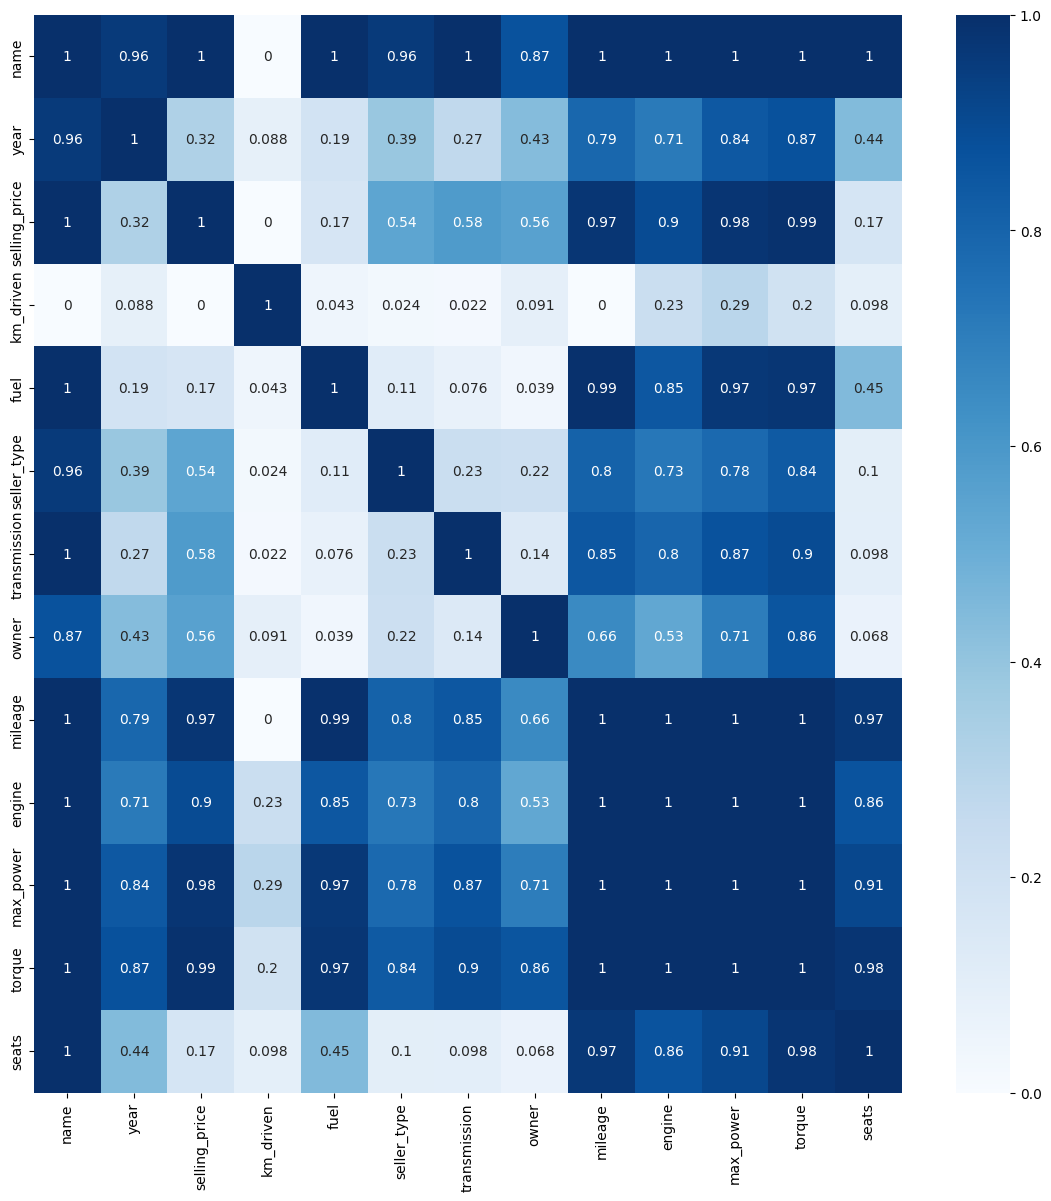

In [12]:

import phik

plt.figure(figsize=(14,14))

ph = df_train.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

In [13]:

profile  = ProfileReport(df_train, title="Profiling Report")
profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 36.40it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Достаточно много пропущенных, количество дубликатов не так критично.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [14]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [15]:
cat_features = ['name', 'fuel',	'seller_type', 'transmission',	'owner', 'mileage',	'engine',	'max_power', 'torque']
num_features = ['year', 'selling_price', 'km_driven', 'seats']

In [16]:
def desc_stat(data: pd.DataFrame, categorical:list = None):
    return data.describe(include=categorical)


def diff(df1: pd.DataFrame, df2: pd.DataFrame, col: str, stat: str): 
    """
    Функция для расчета разницы статистик
    
    """
    stat1 = float(desc_stat(df1)[col].loc[stat])
    stat2 = float(desc_stat(df2)[col].loc[stat])
    difference = stat1 - stat2 
    return stat, col, stat1, stat2, difference, difference/stat1*100

In [17]:
for col in num_features: 
    print(diff(df1=df_train, df2=df_test, col=col, stat='mean'))


for col in num_features:
    print(f'median, {col}, {df_train[col].median()}, {df_test[col].median()}')


('mean', 'year', 2013.818402628947, 2013.681, 0.13740262894702937, 0.006822990035628663)
('mean', 'selling_price', 639515.1971710244, 617901.042, 21614.15517102438, 3.3797719376548527)
('mean', 'km_driven', 69584.61551650235, 71393.341, -1808.7254834976484, -2.599318067754071)
('mean', 'seats', 5.4190083860526705, 5.410805300713558, 0.008203085339112626, 0.15137613295128965)
median, year, 2015.0, 2014.0
median, selling_price, 450000.0, 434999.0
median, km_driven, 60000.0, 61500.0
median, seats, 5.0, 5.0


#### Вывод если судить по значениям средних, то признаки имею +- одинаковое распределение. Но сами распределения скорее всего имею скошенный вид, так как среднее значение и значение медианы отличаются, особенно в целевой переменной (selling price, km_driven). Но для окончательного решения необходимо посмотреть на графики. 

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [18]:
features = list(df_train.columns)
features.remove('selling_price')
target = 'selling_price'
features

['name',
 'year',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'seats']

In [19]:
# 1 
df_train[features].duplicated().sum() # Число дублей  1159 


np.int64(1159)

In [20]:
duplicates = df_train[features][df_train[features].duplicated()] # Вывели строки дубли
duplicates

name  year  km_driven    fuel  \
254                   Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                           Maruti Swift VXI  2012      50000  Petrol   
268                     Maruti Swift Dzire VXI  2014      70000  Petrol   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                              Lexus ES 300h  2019      20000  Petrol   
...                                        ...   ...        ...     ...   
6947                    Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner     mileage   engine   max_power  \
254   Individual       Manual   First Owner   18.9 kmpl  1197 CC      82 bhp   
258   Individual       Manual  Second Owner   18.6 kmpl  1197 CC    85.8 bhp   
268   Individual       Manual  Second Owner   19.1 kmpl  1197 CC    85.8 bhp   
324       Dealer    Automatic   First Owner   13.6 kmpl  1999 CC     177 bhp   
325       Dealer    Automatic   First Owner  22.37 kmpl  2487 CC  214.56 bhp   
...          ...          ...           ...         ...      ...         ...   
6947  Individual       Manual  Second Owner   18.0 kmpl   995 CC      62 bhp   
6984  Individual       Manual   First Owner   24.4 kmpl  1498 CC   98.63 bhp   
6989  Individual       Manual   First Owner  26.59 kmpl  1248 CC      74 bhp   
6997  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   
6998  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   

                   torque  seats  
254        114Nm@ 4000rpm    5.0  
258        114Nm@ 4000rpm    5.0  
268        114Nm@ 4000rpm    5.0  
324   430Nm@ 1750-2500rpm    5.0  
325   202Nm@ 3600-5200rpm    5.0  
...                   ...    ...  
6947      90.3Nm@ 4200rpm    5.0  
6984  215Nm@ 1750-3000rpm    5.0  
6989       190Nm@ 2000rpm    5.0  
6997  140Nm@ 1800-3000rpm    5.0  
6998  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 12 columns]

In [21]:
df_train.drop_duplicates(subset=features,inplace=True)
df_train.shape


(5840, 13)

In [22]:
assert df_train.shape == (5840, 13)

In [23]:
df_train.reset_index(inplace=True)
df_train.head(1)


index                    name  year  selling_price  km_driven    fuel  \
0      0  Maruti Swift Dzire VDI  2014         450000     145500  Diesel   

  seller_type transmission        owner    mileage   engine max_power  \
0  Individual       Manual  First Owner  23.4 kmpl  1248 CC    74 bhp   

           torque  seats  
0  190Nm@ 2000rpm    5.0

In [24]:
for col in df_train.columns:
    try:
        df_train[col] = df_train[col].str.lower()
    except:
        AttributeError # Новые не нашли 





In [25]:
# Поищем скрытые дубли. 1 Вариант привести все строки к одному регистру, убрать пробелы между словами - но это не все скрытые дубли найдет. 
# 2 вариант можно через мерху схоженсти. Взять строчку, превратить ее в одно предложение, 
# определить уровень при котором строки будем считать одинаковыми  и искать такие строчки 
# 3 вариант через расстояние Ливенштейна 
# 4 Модель распознавния (для извращенцев)
# 5 построить модель, которая будет прогнозировать  наиболее вероятное значение для Nan

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test` 

Правильно считать по каждому датасету отдельно






In [26]:
df_train.isna().sum()

index              0
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          186
engine           186
max_power        183
torque           187
seats            186
dtype: int64

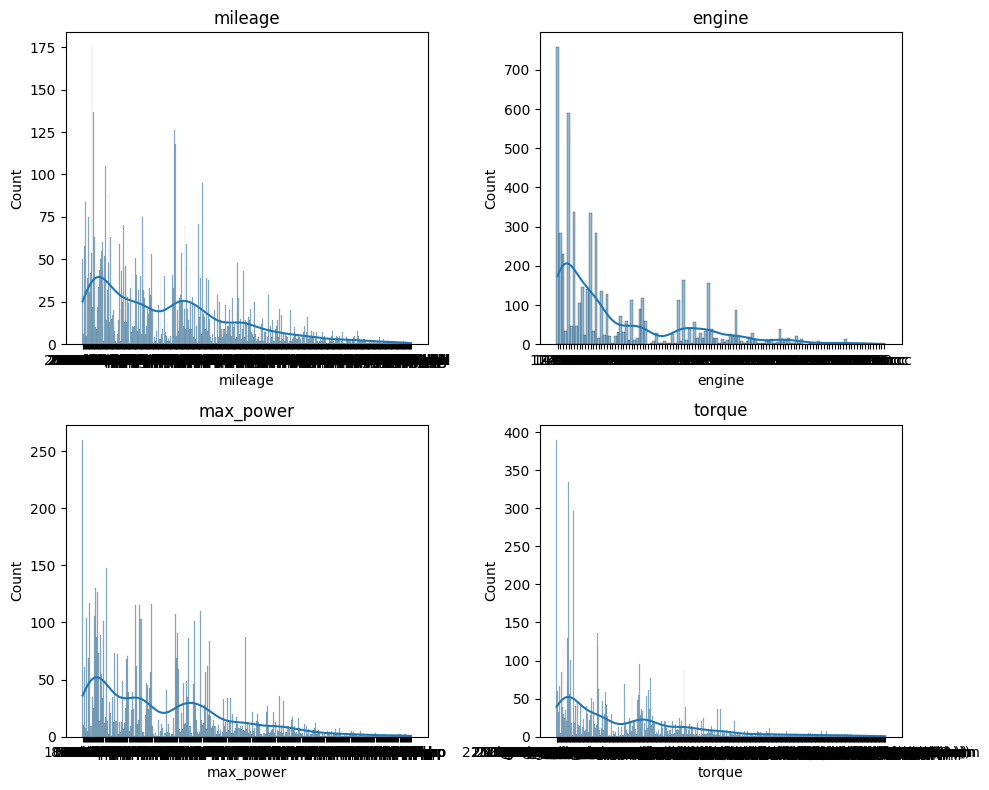

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


columns = ["mileage", "engine", "max_power", "torque", "seats"]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for ax, col in zip(axs.flat, columns):
    sns.histplot(df_train[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()


<Axes: xlabel='seats', ylabel='Count'>

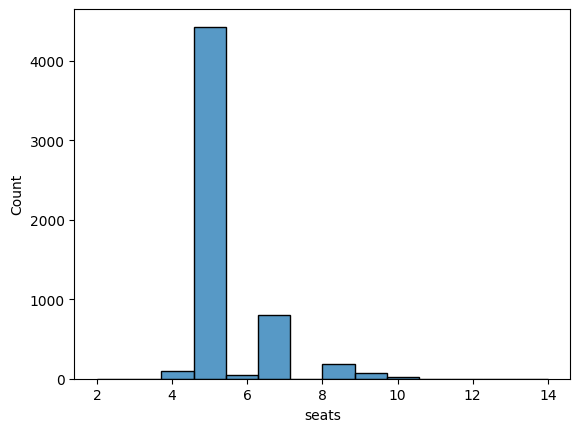

In [28]:
sns.histplot(df_train['seats'])

In [29]:
# С учетом анализа распределений признаков делаем вывод что miliage, torque, max_power, engine - имею ввид скошенного
#  распределения, поэтому заполним пропуски в этих данных медианой + есть выбросы. Пропуски в признаке seats заполним 5(самое частое кол-во мест)

# признак mileage 
df_train.mileage = df_train.mileage.str.replace('kmpl', '')
df_train.mileage = df_train.mileage.str.replace('km/kg', '')
df_train['mileage'] = df_train['mileage'].astype('float')
df_train['mileage'] = df_train['mileage'].fillna(np.nanmedian(df_train['mileage']))

In [30]:
import re

def parse_torque(s):
    if isinstance(s, str):
        nums = re.findall(r"\d+\.?\d*", s)
        if len(nums) >= 2:
            torque = float(nums[0])
            rpm = float(nums[1])
            return torque, rpm
    return np.nan, np.nan


In [31]:
# Признак крутящий  момент. 
# Разделим его на два(крутящий момент - torque_nm  и обороты при котором достигается крутящий момент - torque_rpm)для работы. 
# Еще есть вариант посчитать удельный крутящий момент, но не буду. 
df_train["torque_nm"], df_train["torque_rpm"] = zip(*df_train["torque"].map(parse_torque))
df_train.drop(columns="torque", inplace=True)


df_train['torque_nm'] = df_train['torque_nm'].fillna(np.nanmedian(df_train['torque_nm']))
df_train['torque_rpm'] = df_train['torque_rpm'].fillna(np.nanmedian(df_train['torque_rpm']))


In [32]:
# Признак engine 
df_train['engine'] = df_train['engine'].str.replace('CC', '')
df_train['engine'] = df_train['engine'].str.replace('cc', '')
df_train['engine'] = df_train['engine'].astype('float')
df_train['engine'] = df_train['engine'].fillna(np.nanmedian(df_train['engine']))



In [33]:
# Признак  max power 
df_train["max_power"] = (
    df_train["max_power"]
    .str.replace("bhp", "", regex=False)   # убираем суффикс
    .str.strip()                          # убираем пробелы
    .replace("", np.nan)                  # пустые строки NaN
    .astype(float)    
                   )                 


df_train['max_power'] = df_train['max_power'].astype('float')
df_train['max_power'] = df_train['max_power'].fillna(np.nanmedian(df_train['max_power']))



In [34]:
# Признак seats 
df_train['seats'] = df_train['seats'].fillna(np.nanmedian(df_train['seats']))

In [35]:
df_train.isna().sum()

index            0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
torque_nm        0
torque_rpm       0
dtype: int64

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [36]:
df_train['seasts'] = df_train['seats'].astype('int')
df_train['engine'] = df_train['engine'].astype('int')

`Your answer here`
### Потому что можно число переменных ограничено (дискретно)

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [37]:
df_train.describe()


index         year  selling_price     km_driven      mileage  \
count  5840.000000  5840.000000   5.840000e+03  5.840000e+03  5840.000000   
mean   3393.259075  2013.428425   5.229601e+05  7.395224e+04    19.430841   
std    2037.354489     4.095622   5.354320e+05  6.007114e+04     3.985973   
min       0.000000  1983.000000   2.999900e+04  1.000000e+00     0.000000   
25%    1632.750000  2011.000000   2.500000e+05  3.900000e+04    16.950000   
50%    3310.500000  2014.000000   4.050000e+05  7.000000e+04    19.370000   
75%    5150.250000  2017.000000   6.400000e+05  1.000000e+05    22.300000   
max    6996.000000  2020.000000   1.000000e+07  2.360457e+06    42.000000   

            engine    max_power        seats    torque_nm   torque_rpm  \
count  5840.000000  5840.000000  5840.000000  5840.000000  5840.000000   
mean   1429.448973    87.906371     5.426712   161.181146  2517.922723   
std     485.662834    31.640418     0.982344    91.013887  1210.122441   
min     624.000000     0.000000     2.000000     4.800000     1.000000   
25%    1197.000000    68.000000     5.000000    99.040000  1750.000000   
50%    1248.000000    81.860000     5.000000   150.000000  2000.000000   
75%    1498.000000    99.000000     5.000000   200.000000  3500.000000   
max    3604.000000   400.000000    14.000000   789.000000  5000.000000   

            seasts  
count  5840.000000  
mean      5.426712  
std       0.982344  
min       2.000000  
25%       5.000000  
50%       5.000000  
75%       5.000000  
max      14.000000

`Your answer here`
### Если посмотреть на например seats, то после заполнения пропусков медианой,  среднее значение до 0.965767, после 0.982344. То есть параметры распределения изменились, но само распределение не сдвинулось.  Нет не могло, так как мы лишь заменяем Nan на статистику (медиану), то есть исходные наблюдения не меняются, а меняются Nan на медиану.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

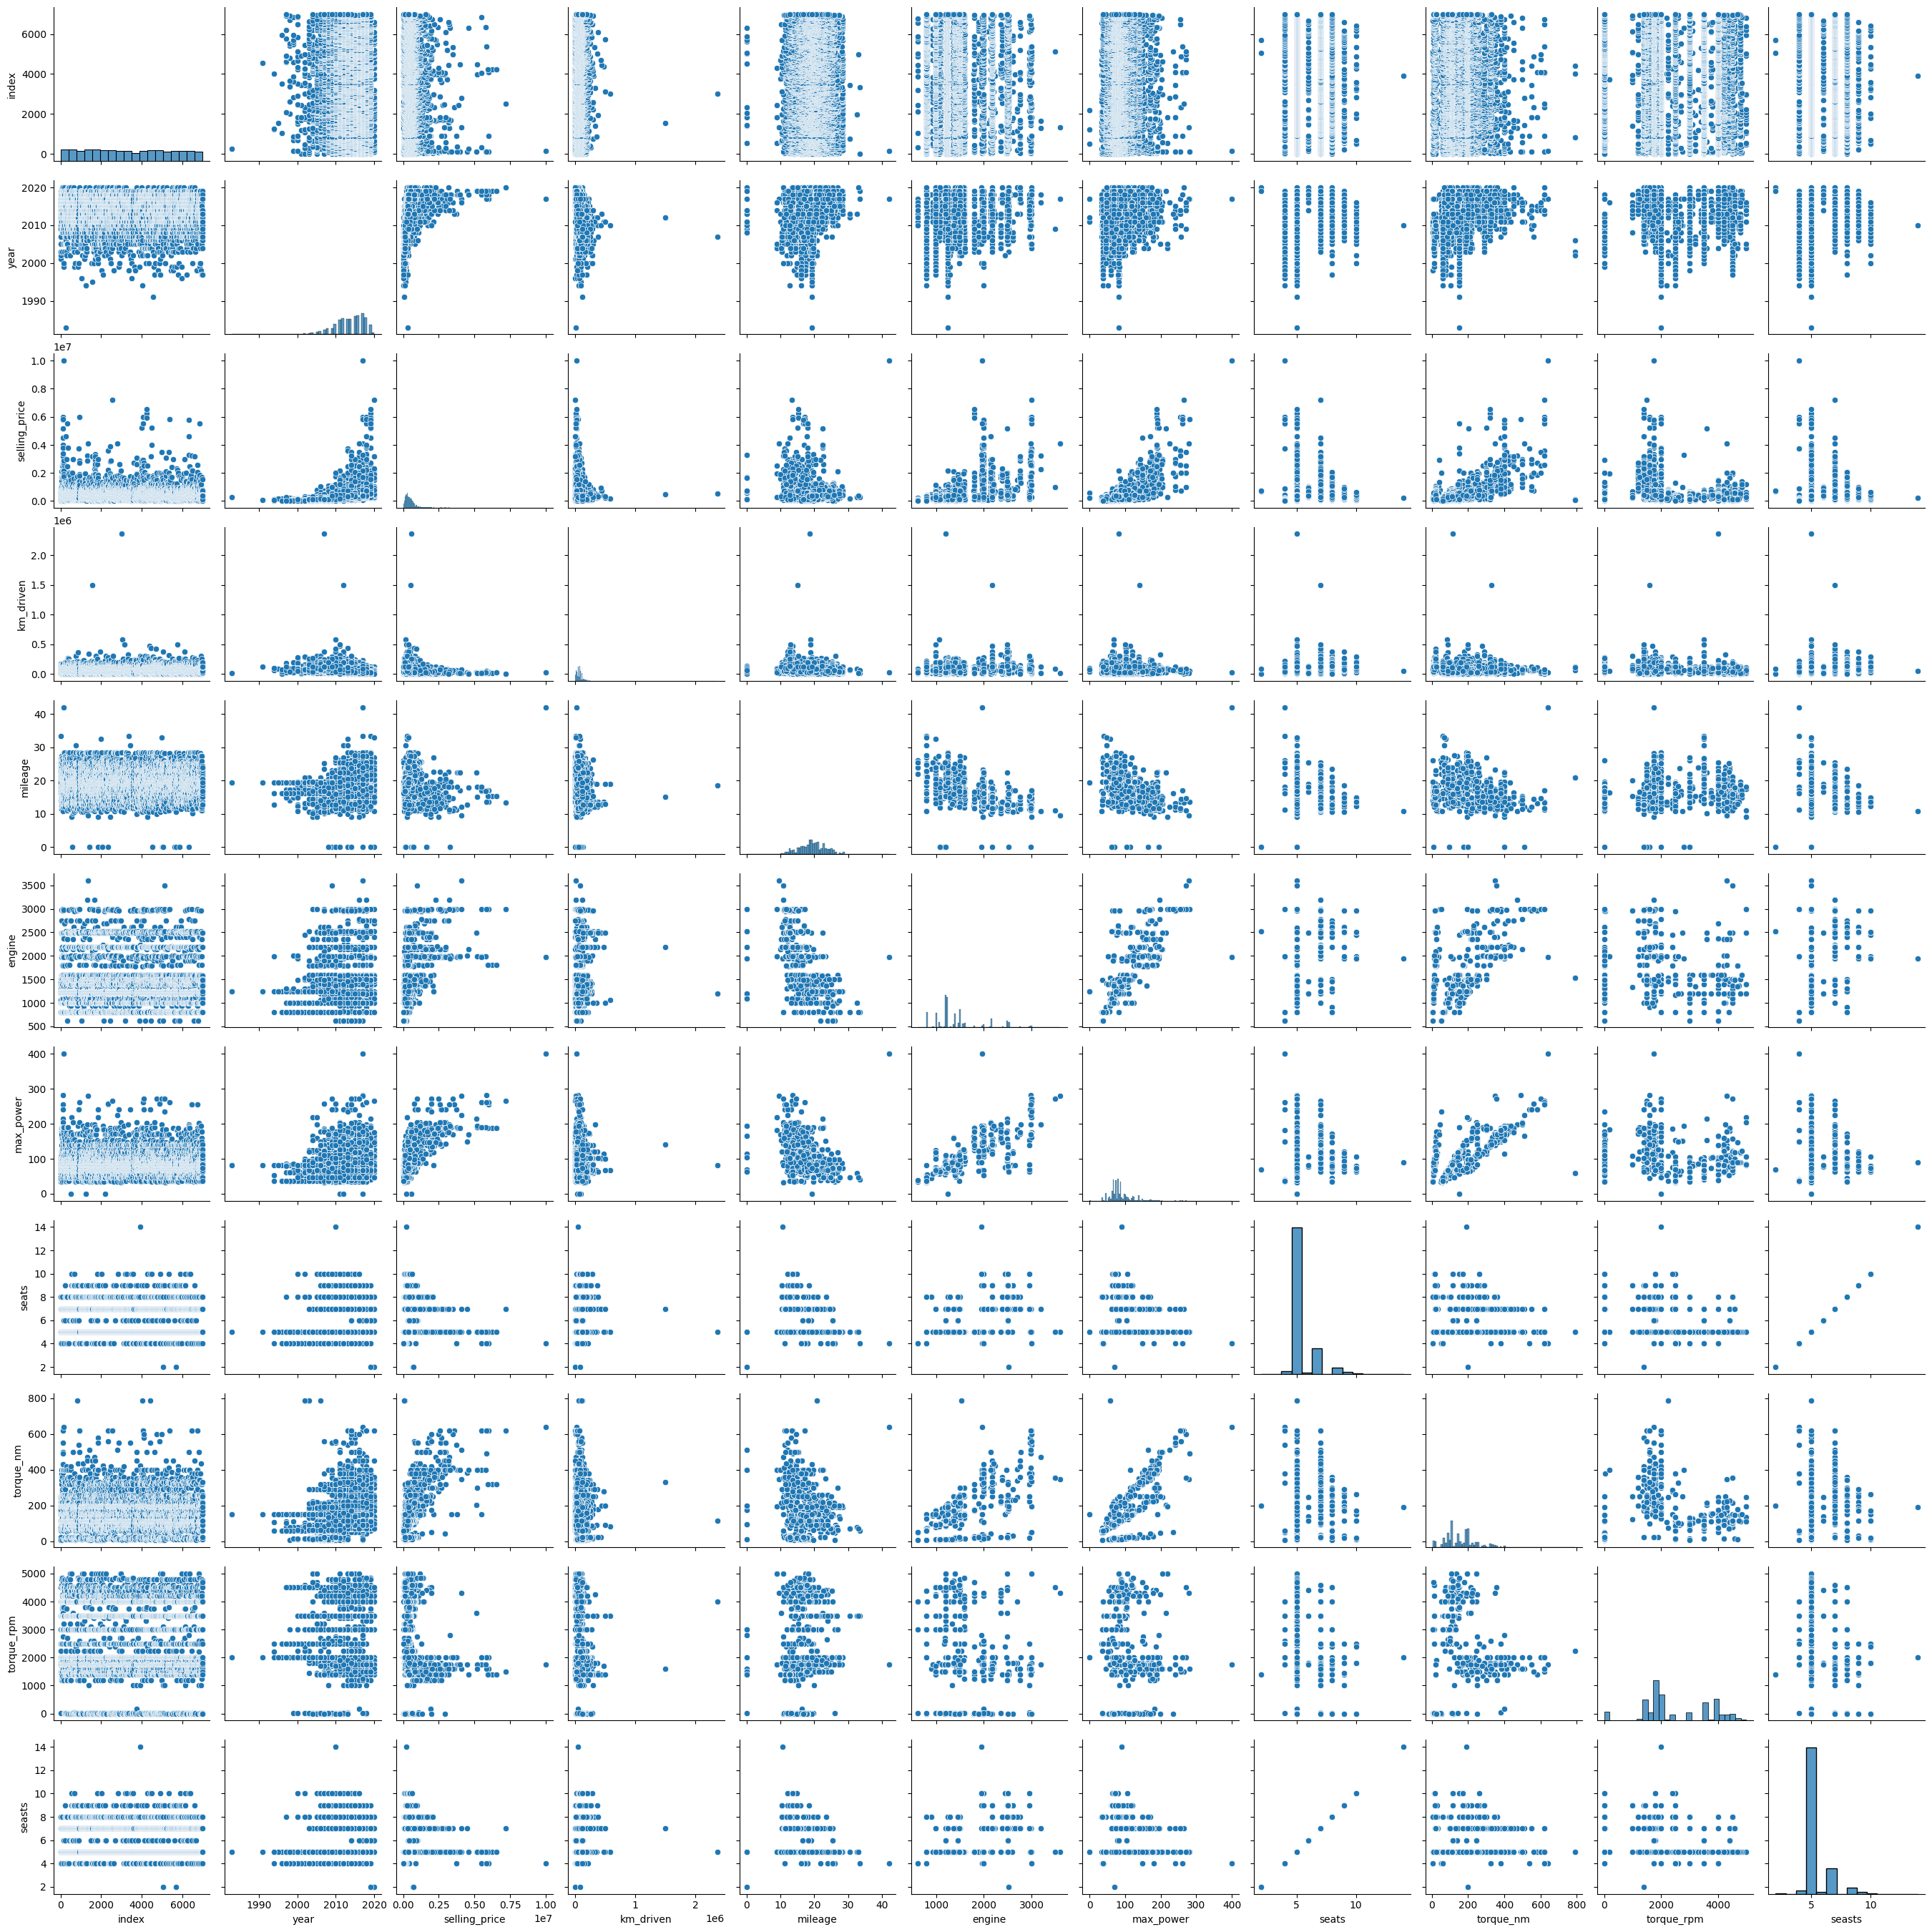

In [38]:
# your code here
sns.pairplot(df_train, )

In [39]:
# По виду распределения зависимости ключевой переменной от каждого признака в отдельности можно предположить какая зависимость:
# Линейная или нелинейная.
# Можно выдвинуть гипотезу о корреляции целевой переменной с признаками по виду их распределения.  Например selling price и max_power:
#  скоорее всего имеют линейную зависимость
#
#

In [40]:
# Заполним пропуски в test аналогично train 
df_test.isna().sum()

df_test.mileage = df_test.mileage.str.replace('kmpl', '')
df_test.mileage = df_test.mileage.str.replace('km/kg', '')
df_test['mileage'] = df_test['mileage'].astype('float')
df_test['mileage'] = df_test['mileage'].fillna(np.nanmedian(df_test['mileage']))

In [41]:
# Признак  max power 
df_test["max_power"] = (
    df_test["max_power"]
    .str.replace("bhp", "", regex=False)   # убираем суффикс
    .str.strip()                          # убираем пробелы
    .replace("", np.nan)                  # пустые строки NaN
    .astype(float)    
                   )                 


df_test['max_power'] = df_test['max_power'].astype('float')
df_test['max_power'] = df_test['max_power'].fillna(np.nanmedian(df_test['max_power']))


In [42]:
# torque
df_test["torque_nm"], df_test["torque_rpm"] = zip(*df_test["torque"].map(parse_torque))
df_test.drop(columns="torque", inplace=True)


df_test['torque_nm'] = df_test['torque_nm'].fillna(np.nanmedian(df_test['torque_nm']))
df_test['torque_rpm'] = df_test['torque_rpm'].fillna(np.nanmedian(df_test['torque_rpm']))

In [43]:
# Признак engine 
df_test['engine'] = df_test['engine'].str.replace('CC', '')
df_test['engine'] = df_test['engine'].str.replace('cc', '')
df_test['engine'] = df_test['engine'].astype('float')
df_test['engine'] = df_test['engine'].fillna(np.nanmedian(df_test['engine']))

In [44]:
# Признак seats
df_test['seats'] = df_test['seats'].fillna(np.nanmedian(df_test['seats']))

In [45]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
torque_nm        0
torque_rpm       0
dtype: int64

In [46]:

def compare_distributions(
    df_train: pd.DataFrame,
    df_test: pd.DataFrame,
    bins: int = 40,
    max_plots: int = None
):
    numeric_cols = df_train.select_dtypes(include=["int64", "float64"]).columns
    
    if max_plots:
        numeric_cols = numeric_cols[:max_plots]

    for col in numeric_cols:
        train = df_train[col].dropna()
        test  = df_test[col].dropna()

        if train.empty or test.empty:
            continue

        plt.figure(figsize=(8, 4))

        plt.hist(train, bins=bins, density=False, alpha=0.4, label="Train")
        plt.hist(test,  bins=bins, density=False, alpha=0.4, label="Test")

        train.plot(kind="kde")
        test.plot(kind="kde")


        plt.title(f"{col}")
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.show()


In [47]:
df_train.drop(columns=['index', 'seasts'], inplace=True)

In [48]:
# Распределения признаков в  train/test визуально похожи, но для подтверждения нужно провести стат тесты

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_nm', 'torque_rpm']


/usr/local/lib/python3.12/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1909. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


<Axes: >

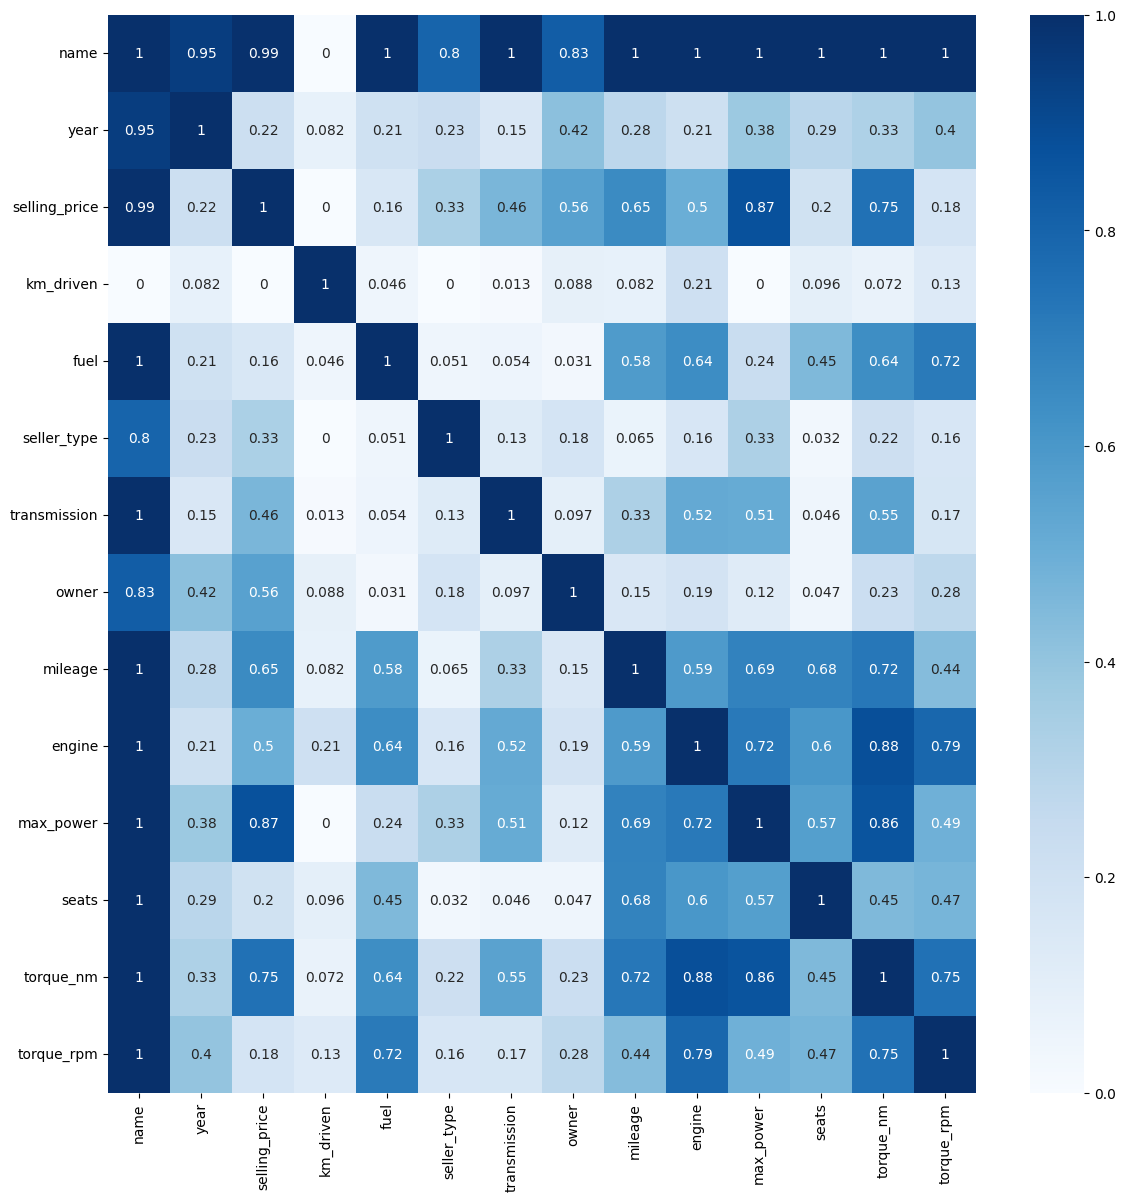

In [49]:
import phik

plt.figure(figsize=(14,14))

ph = df_train.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

In [50]:
df_train.corr(numeric_only=True) # Корреляция только числовых признаков 

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage        0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine         0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power      0.156858       0.692814   0.024588 -0.373390  0.681117   
seats          0.041178       0.149953   0.192328 -0.451059  0.652172   
torque_nm      0.248706       0.604698   0.040707 -0.132141  0.612079   
torque_rpm     0.162739      -0.154424  -0.272061  0.093808 -0.452671   

               max_power     seats  torque_nm  torque_rpm  
year            0.156858  0.041178   0.248706    0.162739  
selling_price   0.692814  0.149953   0.604698   -0.154424  
km_driven       0.024588  0.192328   0.040707   -0.272061  
mileage        -0.373390 -0.451059  -0.132141    0.093808  
engine          0.681117  0.652172   0.612079   -0.452671  
max_power       1.000000  0.244112   0.741411   -0.230517  
seats           0.244112  1.000000   0.311751   -0.307137  
torque_nm       0.741411  0.311751   1.000000   -0.334085  
torque_rpm     -0.230517 -0.307137  -0.334085    1.000000

<Axes: >

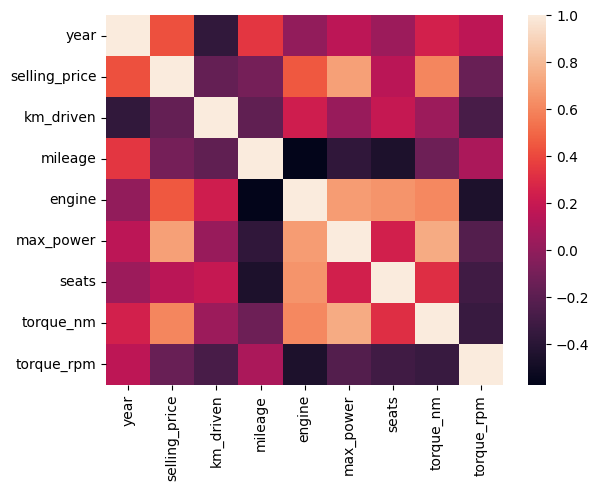

In [51]:
sns.heatmap(df_train.corr(numeric_only=True))

In [52]:
# Сделаем новый признак марка автомобиля 
new_feature = [] 
for row in range(df_train.shape[0]):
    new_feature.append(df_train['name'][::][row].split(' ')[0])

df_train['marka'] = new_feature

In [53]:
df_train.head(1)

name  year  selling_price  km_driven    fuel seller_type  \
0  maruti swift dzire vdi  2014         450000     145500  diesel  individual   

  transmission        owner  mileage  engine  max_power  seats  torque_nm  \
0       manual  first owner     23.4    1248       74.0    5.0      190.0   

   torque_rpm   marka  
0      2000.0  maruti

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

`Your answer here`
### 1 Например max power km_driver (Без учета новых признаков)
### 2 engine max_power/seats  (Без учета новых признакоов ).  engine max_power/seats/torque_nm (С учетом новых признаков)
### 3 Да, так как корреляция отрицательная, то есть обратная. С увеличением year, km_driven уменьшается и наоборот
### 4 Использовалась дефолтная корреляций пирсона для числовых признаков 

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [54]:
df_train['engine'].sort_values(ascending=True)

4885     624
4147     624
3786     624
4284     624
3547     624
        ... 
3148    2999
1183    3198
1478    3198
4344    3498
1208    3604
Name: engine, Length: 5840, dtype: int64

In [55]:
# your code here
# Реализуем коррекляцию спирмена  и кендела 
def spear(df: pd.DataFrame, col1: str, col2):
    d = {col1 : df[col1],
         col2 : df[col2]
    }
    
    spear_df = pd.DataFrame(d)
    spear_df[col1] = spear_df[col1].sort_values(ascending=False).reset_index(drop=True)
    spear_df[col2] = spear_df[col2].sort_values(ascending=False).reset_index(drop=True)
    spear_df['rank'] = [i for i in range(1,  spear_df.shape[0]+1)]
    spear_df.rename(columns={'index':'rank'}, inplace=True)

    spear_df.rename(columns=[''])






    return spear_df 



    


`Your answer here`

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

In [56]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [57]:
df_train.head(1)

name  year  selling_price  km_driven    fuel seller_type  \
0  maruti swift dzire vdi  2014         450000     145500  diesel  individual   

  transmission        owner  mileage  engine  max_power  seats  torque_nm  \
0       manual  first owner     23.4    1248       74.0    5.0      190.0   

   torque_rpm   marka  
0      2000.0  maruti

In [58]:
num_features = ['year',  'km_driven', 'seats', 'mileage', 'engine', 'max_power', 'torque_nm', 'torque_rpm']
target = ['selling_price']
num_features

['year',
 'km_driven',
 'seats',
 'mileage',
 'engine',
 'max_power',
 'torque_nm',
 'torque_rpm']

In [59]:
df_train_nums = df_train.copy()
df_train_nums = df_train_nums[num_features + target]


In [60]:
y_train = df_train[target]
X_train = df_train[num_features]

In [61]:
y_test = df_test[target]
X_test = df_test[num_features]

<Axes: xlabel='selling_price', ylabel='Count'>

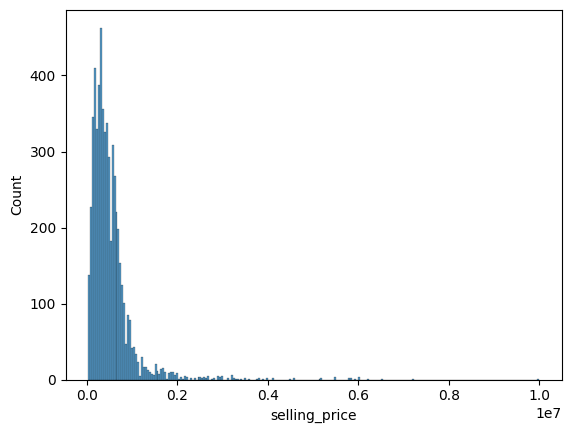

In [62]:
sns.histplot(np.exp(np.log(df_train['selling_price'])))

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)


print(f"R2 на трейне: {r2_score(y_pred=y_pred_train, y_true=y_train)}, MSE на трейне: {MSE(y_pred=y_pred_train, y_true=y_train)}")
print(f"R2 на тесте {r2_score(y_pred=y_pred_test, y_true=y_test)}, MSE на тесте:{MSE(y_pred=y_pred_test, y_true=y_test)}")
print(f"{linreg.coef_}")



R2 на трейне: 0.5998601350176527, MSE на трейне: 114695426009.28911
R2 на тесте 0.5938396811927027, MSE на тесте:233472549417.6488
[[ 3.89789395e+04 -7.97614534e-01 -3.20054103e+04 -4.53362404e+02
   4.63088837e+01  9.15537825e+03  6.05136859e+02 -2.96078238e+01]]


In [64]:
# Низкая метрика R2. Высокая mse,  рост MSE на teste. Данные факторы могут говорить о переробучении модели, влиянии выбросов на модель, некорректном разбиение test train. Когда признаки имеют разный масштаб, линейная регрессия может работать некорректно. 

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [65]:
# Реализация R2 (доля объясненной дисперсии)

def R2(y_true: np.array, y_pred: np.array):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


#### ss_res доля объясненной дисперсии. Показывает, какую долю от всей дисперсии модель смогла объяснить. Чем меньше данной значение, тем хуже объясняющая способность модели. Суммируется квадрат разности прогнозного значения и фактического. 
#### ss_tot доля дисперсии которую объясняется если просто предсказывать среднее значение всей выборки для любого наблюдения. Суммируется квадрат разности фактического значения и среднего значения по всей выборки 

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [66]:
# your code here
# Найдем r2 adjusted 

`Your answer here`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std = StandardScaler()


X_train_scaled = std.fit_transform(df_train[num_features])
X_test_scaled = std.transform(df_test[num_features])




linreg_std = LinearRegression()
linreg_std.fit(X_train_scaled, y_train)

y_pred_train = linreg_std.predict(X_train_scaled)
y_pred_test = linreg_std.predict(X_test_scaled)



print(f"R2 на трейне: {r2_score(y_pred=y_pred_train, y_true=y_train)}, MSE на трейне: {MSE(y_pred=y_pred_train, y_true=y_train)}")
print(f"R2 на тесте {r2_score(y_pred=y_pred_test, y_true=y_test)}, MSE на тесте:{MSE(y_pred=y_pred_test, y_true=y_test)}")
print(f"{linreg.coef_}")

# your code here

R2 на трейне: 0.5998601350176527, MSE на трейне: 114695426009.28912
R2 на тесте 0.5938396811927029, MSE на тесте:233472549417.64868
[[ 3.89789395e+04 -7.97614534e-01 -3.20054103e+04 -4.53362404e+02
   4.63088837e+01  9.15537825e+03  6.05136859e+02 -2.96078238e+01]]


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [max_power ] Какой признак оказался наиболее информативным в предсказании цены?

In [68]:
df_train[num_features + target].corr()

year  km_driven     seats   mileage    engine  max_power  \
year           1.000000  -0.368966  0.041178  0.341334  0.002819   0.156858   
km_driven     -0.368966   1.000000  0.192328 -0.182086  0.229766   0.024588   
seats          0.041178   0.192328  1.000000 -0.451059  0.652172   0.244112   
mileage        0.341334  -0.182086 -0.451059  1.000000 -0.572893  -0.373390   
engine         0.002819   0.229766  0.652172 -0.572893  1.000000   0.681117   
max_power      0.156858   0.024588  0.244112 -0.373390  0.681117   1.000000   
torque_nm      0.248706   0.040707  0.311751 -0.132141  0.612079   0.741411   
torque_rpm     0.162739  -0.272061 -0.307137  0.093808 -0.452671  -0.230517   
selling_price  0.427279  -0.164828  0.149953 -0.104769  0.447672   0.692814   

               torque_nm  torque_rpm  selling_price  
year            0.248706    0.162739       0.427279  
km_driven       0.040707   -0.272061      -0.164828  
seats           0.311751   -0.307137       0.149953  
mileage        -0.132141    0.093808      -0.104769  
engine          0.612079   -0.452671       0.447672  
max_power       0.741411   -0.230517       0.692814  
torque_nm       1.000000   -0.334085       0.604698  
torque_rpm     -0.334085    1.000000      -0.154424  
selling_price   0.604698   -0.154424       1.000000

In [69]:
df_train[num_features].head(1)

year  km_driven  seats  mileage  engine  max_power  torque_nm  torque_rpm
0  2014     145500    5.0     23.4    1248       74.0      190.0      2000.0

In [70]:
linreg.coef_

array([[ 3.89789395e+04, -7.97614534e-01, -3.20054103e+04,
        -4.53362404e+02,  4.63088837e+01,  9.15537825e+03,
         6.05136859e+02, -2.96078238e+01]])

#### Max_power

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [71]:
df_train.head(1)

name  year  selling_price  km_driven    fuel seller_type  \
0  maruti swift dzire vdi  2014         450000     145500  diesel  individual   

  transmission        owner  mileage  engine  max_power  seats  torque_nm  \
0       manual  first owner     23.4    1248       74.0    5.0      190.0   

   torque_rpm   marka  
0      2000.0  maruti

In [72]:
# Без стандартизации 
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error as MSE

Lassoreg = Lasso()
Lassoreg.fit(X_train, y_train)

y_pred_train = Lassoreg.predict(X_train)
y_pred_test = Lassoreg.predict(X_test)


print(f"R2 на трейне: {r2_score(y_pred=y_pred_train, y_true=y_train)}, MSE на трейне: {MSE(y_pred=y_pred_train, y_true=y_train)}")
print(f"R2 на тесте {r2_score(y_pred=y_pred_test, y_true=y_test)}, MSE на тесте:{MSE(y_pred=y_pred_test, y_true=y_test)}")





R2 на трейне: 0.5998601350071144, MSE на трейне: 114695426012.30978
R2 на тесте 0.5938394085322096, MSE на тесте:233472706150.6862


In [73]:
# Со стандартизацией
from sklearn.preprocessing import StandardScaler


std = StandardScaler()
X_train_scaled = std.fit_transform(df_train[num_features])
X_test_scaled = std.transform(df_test[num_features])



Lassoreg_std = Lasso()
Lassoreg_std.fit(X_train_scaled, y_train)

y_pred_train = Lassoreg_std.predict(X_train_scaled)
y_pred_test = Lassoreg_std.predict(X_test_scaled)



print(f"R2 на трейне: {r2_score(y_pred=y_pred_train, y_true=y_train)}, MSE на трейне: {MSE(y_pred=y_pred_train, y_true=y_train)}")
print(f"R2 на тесте {r2_score(y_pred=y_pred_test, y_true=y_test)}, MSE на тесте:{MSE(y_pred=y_pred_test, y_true=y_test)}")

# your code here

R2 на трейне: 0.5998601349745393, MSE на трейне: 114695426021.64706
R2 на тесте 0.5938385415815777, MSE на тесте:233473204498.6658


In [74]:
df_train[num_features].head(1)

year  km_driven  seats  mileage  engine  max_power  torque_nm  torque_rpm
0  2014     145500    5.0     23.4    1248       74.0      190.0      2000.0

In [75]:
df_train[num_features+target].corr()

year  km_driven     seats   mileage    engine  max_power  \
year           1.000000  -0.368966  0.041178  0.341334  0.002819   0.156858   
km_driven     -0.368966   1.000000  0.192328 -0.182086  0.229766   0.024588   
seats          0.041178   0.192328  1.000000 -0.451059  0.652172   0.244112   
mileage        0.341334  -0.182086 -0.451059  1.000000 -0.572893  -0.373390   
engine         0.002819   0.229766  0.652172 -0.572893  1.000000   0.681117   
max_power      0.156858   0.024588  0.244112 -0.373390  0.681117   1.000000   
torque_nm      0.248706   0.040707  0.311751 -0.132141  0.612079   0.741411   
torque_rpm     0.162739  -0.272061 -0.307137  0.093808 -0.452671  -0.230517   
selling_price  0.427279  -0.164828  0.149953 -0.104769  0.447672   0.692814   

               torque_nm  torque_rpm  selling_price  
year            0.248706    0.162739       0.427279  
km_driven       0.040707   -0.272061      -0.164828  
seats           0.311751   -0.307137       0.149953  
mileage        -0.132141    0.093808      -0.104769  
engine          0.612079   -0.452671       0.447672  
max_power       0.741411   -0.230517       0.692814  
torque_nm       1.000000   -0.334085       0.604698  
torque_rpm     -0.334085    1.000000      -0.154424  
selling_price   0.604698   -0.154424       1.000000

In [76]:
print(f"Л1  {Lassoreg.coef_}")
print(f"Л1 c стандартизацией {Lassoreg_std.coef_}")
print(f"дефолтная модель {linreg.coef_}")
print(f"дефолтная  c стандартизацией {linreg_std.coef_}")





Л1  [ 3.89786848e+04 -7.97618776e-01 -3.20029479e+04 -4.53026241e+02
  4.63064077e+01  9.15541699e+03  6.05132676e+02 -2.96075515e+01]
Л1 c стандартизацией [159627.20670182 -47908.59747646 -31433.77155134  -1804.0449437
  22486.60371384 289657.0582155   55070.21464376 -35824.29100454]
дефолтная модель [[ 3.89789395e+04 -7.97614534e-01 -3.20054103e+04 -4.53362404e+02
   4.63088837e+01  9.15537825e+03  6.05136859e+02 -2.96078238e+01]]
дефолтная  c стандартизацией [[159629.3313835  -47909.50917298 -31437.62924624  -1806.93565029
   22488.57805754 289655.195355    55071.14223634 -35826.02427874]]


In [77]:
# Модель Лассо с стандартизацией никак не зануляет признаки, что говорит о том что все признаки вносят вклад в модель. + Они имели большое значение коэфов в линейной модели без регуляризации.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

pipe = Pipeline([
    ("model", Lasso())
])

param_grid={
        'model__alpha': np.logspace(-3, 100, 10),
        'model__max_iter': [10000, 50000, 100000],
    }

gs = GridSearchCV(
    pipe,
    param_grid,
    cv=10,
    scoring="r2"
)

gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

y_pred = gs.best_estimator_.predict(X_test)
print(r2_score(y_test, y_pred), MSE(y_test, y_pred))

{'model__alpha': np.float64(0.001), 'model__max_iter': 10000}
0.5738081667943107
0.5938396809195603 233472549574.65884


In [79]:
gs.best_params_

{'model__alpha': np.float64(0.001), 'model__max_iter': 10000}

In [80]:
gs.best_estimator_.named_steps["model"].coef_


array([ 3.89789393e+04, -7.97614538e-01, -3.20054078e+04, -4.53362068e+02,
        4.63088813e+01,  9.15537829e+03,  6.05136855e+02, -2.96078235e+01])

In [81]:
gs.feature_names_in_

array(['year', 'km_driven', 'seats', 'mileage', 'engine', 'max_power',
       'torque_nm', 'torque_rpm'], dtype=object)

####  1) 1000 моделей (10 * 3) 
####  2) Гиперпараметр альфа "силы" регуляризации, макс кол-во итерация  для сходимости 
####  3) km_driven - практически занулился (-7.97614538e-01) km_driven 
####  4) коэф регуляризации - model__alpha': np.float64(0.001)


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [82]:

from sklearn.linear_model import ElasticNet


pipe = Pipeline([
    ("model", ElasticNet())
])

param_grid={
        'model__alpha': np.logspace(-3, 100, 10),
        'model__l1_ratio': np.linspace(0.05, 1.0, 20),
        'model__max_iter': [50000],
    }

gs = GridSearchCV(
    pipe,
    param_grid,
    cv=10,
    scoring="r2"
)

gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

y_pred = gs.best_estimator_.predict(X_test)
print(r2_score(y_test, y_pred), MSE(y_test, y_pred))

{'model__alpha': np.float64(0.001), 'model__l1_ratio': np.float64(1.0), 'model__max_iter': 50000}
0.5738081667943107
0.5938396809195603 233472549574.65884


In [83]:
gs.best_params_

{'model__alpha': np.float64(0.001),
 'model__l1_ratio': np.float64(1.0),
 'model__max_iter': 50000}

In [84]:
gs.best_estimator_.named_steps["model"].coef_


array([ 3.89789393e+04, -7.97614538e-01, -3.20054078e+04, -4.53362068e+02,
        4.63088813e+01,  9.15537829e+03,  6.05136855e+02, -2.96078235e+01])

In [85]:
gs.feature_names_in_

array(['year', 'km_driven', 'seats', 'mileage', 'engine', 'max_power',
       'torque_nm', 'torque_rpm'], dtype=object)

 ####   200 моделей 
 ####  model__alpha': np.float64(0.001),  model__l1_ratio': np.float64(1.0)

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [86]:
# Воспользуемся жадной апроксимацией L0 регуляризацией через  алгоритм Sequential Feature Selector из sklearn для выбора набора признаков, которые лучше всего улучшают ключевую метрику.

In [87]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import KFold

est = LinearRegression()

pipe = Pipeline([
    ("sfs", SequentialFeatureSelector(
        estimator=est,
        direction="forward",
        scoring="r2", 
        cv=10,                           
        n_jobs=-1
    )),
    ("model", est)
])

# перебираем сколько признаков оставить
param_grid = {
    "sfs__n_features_to_select": list(range(1, X_train.shape[1] + 1))
}

outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="r2",   # метрика итоговой оценки
    cv=outer_cv,
    n_jobs=-1,
    refit=True,
    return_train_score=True
)

gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Best score:", gs.best_score_)

# какие признаки выбрались в лучшей модели
mask = gs.best_estimator_.named_steps["sfs"].get_support()
selected_idx = np.where(mask)[0]
print("Selected feature idx:", selected_idx)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw

Best params: {'sfs__n_features_to_select': 4}
Best score: 0.5823932532874416
Selected feature idx: [0 5 6 7]


In [88]:
X_train.columns[selected_idx]

Index(['year', 'max_power', 'torque_nm', 'torque_rpm'], dtype='object')

In [89]:
df_train[num_features + target].corr()

year  km_driven     seats   mileage    engine  max_power  \
year           1.000000  -0.368966  0.041178  0.341334  0.002819   0.156858   
km_driven     -0.368966   1.000000  0.192328 -0.182086  0.229766   0.024588   
seats          0.041178   0.192328  1.000000 -0.451059  0.652172   0.244112   
mileage        0.341334  -0.182086 -0.451059  1.000000 -0.572893  -0.373390   
engine         0.002819   0.229766  0.652172 -0.572893  1.000000   0.681117   
max_power      0.156858   0.024588  0.244112 -0.373390  0.681117   1.000000   
torque_nm      0.248706   0.040707  0.311751 -0.132141  0.612079   0.741411   
torque_rpm     0.162739  -0.272061 -0.307137  0.093808 -0.452671  -0.230517   
selling_price  0.427279  -0.164828  0.149953 -0.104769  0.447672   0.692814   

               torque_nm  torque_rpm  selling_price  
year            0.248706    0.162739       0.427279  
km_driven       0.040707   -0.272061      -0.164828  
seats           0.311751   -0.307137       0.149953  
mileage        -0.132141    0.093808      -0.104769  
engine          0.612079   -0.452671       0.447672  
max_power       0.741411   -0.230517       0.692814  
torque_nm       1.000000   -0.334085       0.604698  
torque_rpm     -0.334085    1.000000      -0.154424  
selling_price   0.604698   -0.154424       1.000000

#### Были выбраны: year, max_power, torque_nm, torque_rpm. Если смотреть на корреляцию признаков с целевой переменной, то эти признаки имеют наибольшую корреляцию с целевой переменной selling_price. 
#### То есть параметр регуляризации L0 в данном случае равен  4. Качество при этом не сильно упало по сравнению с моделью на всех признаках и не улучшилось по сравнению c другими моделями 

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [90]:
new_feature = [] 
for row in range(df_train.shape[0]):
    new_feature.append(df_train['name'][::][row].split(' ')[0])
df_train['marka'] = new_feature

new_feature = [] 
for row in range(df_test.shape[0]):
    new_feature.append(df_test['name'][::][row].split(' ')[0])

df_test['marka'] = new_feature

In [91]:
# вытащили марку автомобиля из name до этого

df_train = df_train.drop(columns=['name'])
df_test = df_test.drop(columns=['name'])




In [92]:
df_train.head(1)

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  diesel  individual       manual   

         owner  mileage  engine  max_power  seats  torque_nm  torque_rpm  \
0  first owner     23.4    1248       74.0    5.0      190.0      2000.0   

    marka  
0  maruti

In [93]:
cat_features = ['fuel',	'seller_type', 'transmission',	'owner', 'marka', 'seats']
num_features = ['year',  'km_driven', 'mileage', 'engine', 'max_power', 'torque_nm', 'torque_rpm'] 

In [94]:
X_train = df_train[cat_features + num_features]
y_train = df_train[target]


X_test = df_test[cat_features + num_features]
y_test = df_test[target]

In [95]:
# assert X_train_cat.shape == (5840, 11)  # Я добавил 3 новых признака (marka, torque_nm, torque_rpm)

In [96]:
X_train.describe(include='object')

fuel seller_type transmission        owner   marka
count     5840        5840         5840         5840    5840
unique       4           3            2            5      30
top     diesel  individual       manual  first owner  maruti
freq      3177        5223         5336         3603    1804

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [97]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
X_train_cat = ohe.fit_transform(X_train[cat_features])
X_test_cat = ohe.transform(X_test[cat_features])
X_train_cat.shape, X_test_cat.shape




/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


((5840, 47), (1000, 47))

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

In [98]:
# Можем быть утечки в данных при применении one hot encoding, если в тестовом наборе появляются новые категории, которых не было в тренировочном.x
# Удаляем один столбец из каждой категории при помощи drop='first' в OneHotEncoder потому что он несет избыточную информацию в результате дамми кодирования возникает   мультиколлинеарность.
# Нет, некорректно. Так как мы теряем информацию о некоторых категориях в признаках.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [99]:
from scipy.sparse import hstack, csr_matrix

In [100]:
X_train_num = df_train[num_features]
X_test_num = df_test[num_features]

In [101]:
X_train = hstack([csr_matrix(X_train_num.values), X_train_cat])
X_test  = hstack([csr_matrix(X_test_num.values),  X_test_cat])
X_train.shape, X_test.shape

((5840, 54), (1000, 54))

In [102]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

model_ridge_num_cat = Ridge()

pipe = Pipeline([
    ("model", model_ridge_num_cat),
])


param_grid={
        'model__alpha': np.logspace(-4, 100, 100),
        'model__max_iter': [10000, 50000, 100000],
}

gs_ridge_num_cat = GridSearchCV(
    pipe,
    param_grid,
    cv=10,
    scoring="r2"
)   

gs_ridge_num_cat.fit(X_train, y_train)
print(gs_ridge_num_cat.best_params_)
print(gs_ridge_num_cat.best_score_)

y_pred_test = gs_ridge_num_cat.best_estimator_.predict(X_test)
y_pred_train = gs_ridge_num_cat.best_estimator_.predict(X_train)

print(r2_score(y_test, y_pred_test), MSE(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train), MSE(y_train, y_pred_train))




{'model__alpha': np.float64(25353.644939701167), 'model__max_iter': 10000}
0.4805824210950549
0.5600997999988702 252867196591.71225
0.5390400193017569 132128802916.82785


In [103]:
from sklearn.linear_model import LinearRegression

model_lin_num_cat = LinearRegression()
model_lin_num_cat.fit(X_train, y_train)


y_pred_test = model_lin_num_cat.predict(X_test)
y_pred_train = model_lin_num_cat.predict(X_train)

print(r2_score(y_train, y_pred_train), MSE(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test), MSE(y_test, y_pred_test))






# your code here

0.6499855846723371 100327550410.82846
0.523060922821238 274158200862.20038


In [104]:
# Лучшее качество на тесте показала ridge регрессия с стандартизацией и one hot encoding категориальных признаков. 0,56 на тесте без стандартизации

In [105]:
# Попробуем все тоже самое, но только с стандартизацией числовых признаков

from sklearn.preprocessing import StandardScaler
std = StandardScaler()


X_train_num_std = pd.DataFrame(
    std.fit_transform(df_train[num_features]),
    columns=num_features
)

X_test_num_std = pd.DataFrame(
    std.transform(df_test[num_features]),
    columns=num_features
)
X_train_std = hstack([csr_matrix(X_train_num_std.values), X_train_cat])
X_test_std  = hstack([csr_matrix(X_test_num_std.values),  X_test_cat])


In [106]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV




model_ridge_num_cat_std = Ridge()

pipe = Pipeline([
    ("model", model_ridge_num_cat_std),
])


param_grid={
        'model__alpha': np.logspace(-3, 100, 100),
        'model__max_iter': [10000, 50000, 100000],
}

gs_ridge_num_cat_std = GridSearchCV(
    pipe,
    param_grid,
    cv=10,
    scoring="r2"
)   



gs_ridge_num_cat_std.fit(X_train_std, y_train)

y_pred_train = gs_ridge_num_cat_std.best_estimator_.predict(X_train_std)
y_pred_test = gs_ridge_num_cat_std.best_estimator_.predict(X_test_std)


print(r2_score(y_train, y_pred_train), MSE(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test), MSE(y_test, y_pred_test))

gs_ridge_num_cat_std.best_params_

0.7727589259581328 65136003870.022285
0.17304102749998118 475359631734.43787


{'model__alpha': np.float64(1.3219411484660286), 'model__max_iter': 10000}

In [107]:
print(r2_score(y_train, y_pred_train), MSE(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test), MSE(y_test, y_pred_test))

0.7727589259581328 65136003870.022285
0.17304102749998118 475359631734.43787


In [108]:
from sklearn.linear_model import LinearRegression

model_lin_num_cat_std = LinearRegression()
model_lin_num_cat_std.fit(X_train_std, y_train)


y_pred_test = model_lin_num_cat_std.predict(X_test_std)
y_pred_train = model_lin_num_cat_std.predict(X_train_std)

print(r2_score(y_train, y_pred_train), MSE(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test), MSE(y_test, y_pred_test))




0.7771466515458343 63878313498.39313
0.11928787566081178 506258478367.1616


In [109]:
# Получается сильное переобучение модели линейной регрессии без регуляризации и с стандартизацией числовых признаков. Тоже самое с ridge регрессией, но не так сильно.

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

<Axes: >

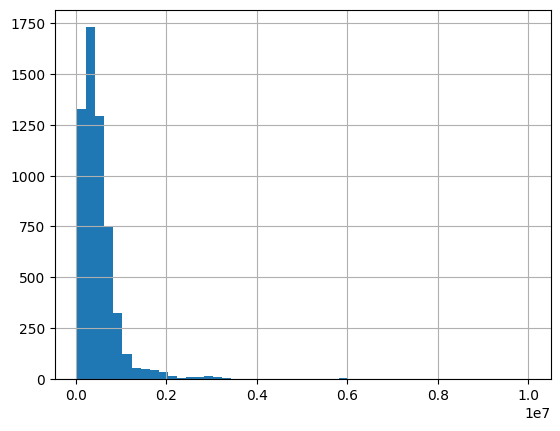

In [110]:
df_train['selling_price'].hist(bins=50)

<Axes: >

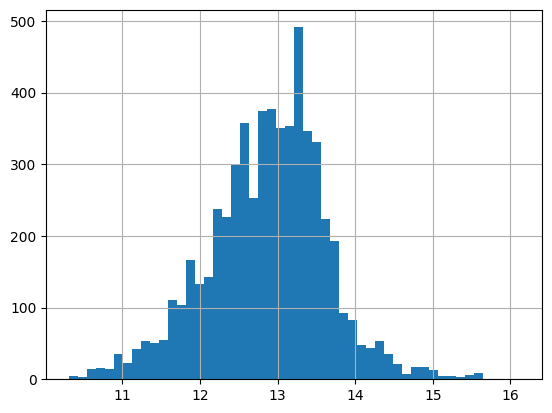

In [111]:
np.log(df_train['selling_price']).hist(bins=50)

In [112]:
y_train_new = np.log(y_train)
y_test_new = np.log(y_test)



from sklearn.linear_model import LinearRegression

model_lin_num_cat_std = LinearRegression()
model_lin_num_cat_std.fit(X_train_std, y_train_new)


y_pred_test = model_lin_num_cat_std.predict(X_test_std)
y_pred_train = model_lin_num_cat_std.predict(X_train_std)

print(r2_score(y_train_new, y_pred_train), MSE(y_train_new, y_pred_train))
print(r2_score(y_test_new, y_pred_test), MSE(y_test_new, y_pred_test))

model_lin_num_cat_std.coef_

0.8825355843368592 0.06864443083456151
0.7198363094713824 0.20040309362364359


array([[ 4.48527823e-01, -2.14131706e-02,  4.62558889e-04,
         8.25430746e-02,  2.53408264e-01, -1.52037146e-03,
         2.13963316e-02,  3.75770243e-01,  1.75421959e-01,
         9.55752250e-02, -4.70298520e-02,  4.40289598e-02,
        -7.30876740e-02, -1.49286493e-01, -9.23531047e-02,
         8.50281801e-01, -1.11878128e-01, -4.70947285e-02,
         1.23965287e-01, -7.23606827e-01, -1.22865920e-01,
        -6.88862178e-01, -5.89718056e-01, -5.34725736e-01,
        -4.61946148e-01, -2.94241370e-01, -3.54329033e-01,
        -3.88456666e-01, -1.00616102e-01, -2.16609285e-01,
        -2.95582986e-01,  4.34536572e-01,  3.82441027e-01,
        -4.45552409e-01, -3.07575455e-01,  1.19922119e-01,
         7.59327893e-02, -1.39258478e-01, -3.89724550e-01,
        -3.88172759e-01, -4.51350662e-01, -4.09660572e-01,
        -7.64171564e-01, -1.25918769e-01, -3.93157780e-01,
         1.65020711e-01,  3.34781845e-02,  2.20043104e-01,
         1.29566320e-01,  3.27832580e-01,  2.80321352e-0

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV




model_ridge_num_cat_std = Ridge()

pipe = Pipeline([
    ("model", model_ridge_num_cat_std),
])


param_grid={
        'model__alpha': np.logspace(-3, 100, 100),
        'model__max_iter': [10000, 50000, 100000],
}

gs_ridge_num_cat_std = GridSearchCV(
    pipe,
    param_grid,
    cv=10,
    scoring="r2"
)   



gs_ridge_num_cat_std.fit(X_train_std, y_train_new)

y_pred_train = gs_ridge_num_cat_std.best_estimator_.predict(X_train_std)
y_pred_test = gs_ridge_num_cat_std.best_estimator_.predict(X_test_std)


print(r2_score(y_train_new, y_pred_train), MSE(y_train_new, y_pred_train))
print(r2_score(y_test_new, y_pred_test), MSE(y_test_new, y_pred_test))

0.882477194437925 0.06867855300982789
0.8128123375204495 0.13389667511268227


In [114]:
df_train[num_features + target].corr()

year  km_driven   mileage    engine  max_power  torque_nm  \
year           1.000000  -0.368966  0.341334  0.002819   0.156858   0.248706   
km_driven     -0.368966   1.000000 -0.182086  0.229766   0.024588   0.040707   
mileage        0.341334  -0.182086  1.000000 -0.572893  -0.373390  -0.132141   
engine         0.002819   0.229766 -0.572893  1.000000   0.681117   0.612079   
max_power      0.156858   0.024588 -0.373390  0.681117   1.000000   0.741411   
torque_nm      0.248706   0.040707 -0.132141  0.612079   0.741411   1.000000   
torque_rpm     0.162739  -0.272061  0.093808 -0.452671  -0.230517  -0.334085   
selling_price  0.427279  -0.164828 -0.104769  0.447672   0.692814   0.604698   

               torque_rpm  selling_price  
year             0.162739       0.427279  
km_driven       -0.272061      -0.164828  
mileage          0.093808      -0.104769  
engine          -0.452671       0.447672  
max_power       -0.230517       0.692814  
torque_nm       -0.334085       0.604698  
torque_rpm       1.000000      -0.154424  
selling_price   -0.154424       1.000000

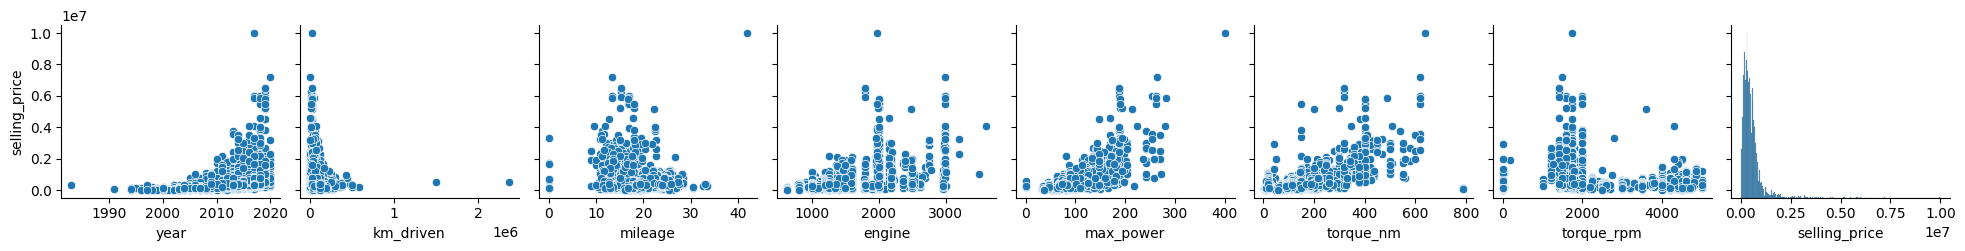

In [115]:
import seaborn as sns

target_col = 'selling_price'

cols = num_features + [target_col]

sns.pairplot(
    df_train[cols],
    y_vars=[target_col],   # по Y только таргет
    x_vars=cols,   # по X признаки
    diag_kind="hist"
)

In [116]:
df_train['year*year'] = df_train['year']*df_train['year']
num_features = num_features + ['year*year']
num_features.remove('year')

In [117]:
df_train['1/km_driven'] = 1/df_train['km_driven']
num_features = num_features + ['1/km_driven']
df_train['log_km_driven'] = np.log(df_train['km_driven'])
num_features = num_features + ['log_km_driven']

In [118]:
df_test['1/km_driven'] = 1/df_test['km_driven']

In [119]:
df_test['year*year'] = df_test['year']*df_test['year']
df_test['log_km_driven'] = np.log(df_test['km_driven'])

In [120]:
num_features.remove('km_driven')
num_features.remove('1/km_driven')

In [121]:
df_test[num_features + target].corr()

mileage    engine  max_power  torque_nm  torque_rpm  \
mileage        1.000000 -0.601736  -0.404730  -0.181582    0.094097   
engine        -0.601736  1.000000   0.726803   0.634465   -0.414285   
max_power     -0.404730  0.726803   1.000000   0.747339   -0.218457   
torque_nm     -0.181582  0.634465   0.747339   1.000000   -0.365672   
torque_rpm     0.094097 -0.414285  -0.218457  -0.365672    1.000000   
year*year      0.341637  0.013017   0.228067   0.294824    0.170157   
log_km_driven -0.168293  0.198383  -0.049163   0.009461   -0.334155   
selling_price -0.150184  0.468086   0.750701   0.604533   -0.119613   

               year*year  log_km_driven  selling_price  
mileage         0.341637      -0.168293      -0.150184  
engine          0.013017       0.198383       0.468086  
max_power       0.228067      -0.049163       0.750701  
torque_nm       0.294824       0.009461       0.604533  
torque_rpm      0.170157      -0.334155      -0.119613  
year*year       1.000000      -0.523383       0.416687  
log_km_driven  -0.523383       1.000000      -0.307222  
selling_price   0.416687      -0.307222       1.000000

In [122]:
X_train_num_std = pd.DataFrame(
    std.fit_transform(df_train[num_features]),
    columns=num_features
)

X_test_num_std = pd.DataFrame(
    std.transform(df_test[num_features]),
    columns=num_features
)
X_train_std = hstack([csr_matrix(X_train_num_std.values), X_train_cat])
X_test_std  = hstack([csr_matrix(X_test_num_std.values),  X_test_cat])

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV




model_ridge_num_cat_std = Ridge()

pipe = Pipeline([
    ("model", model_ridge_num_cat_std),
])


param_grid={
        'model__alpha': np.logspace(-3, 100, 100),
        'model__max_iter': [10000, 50000, 100000],
}

gs_ridge_num_cat_std = GridSearchCV(
    pipe,
    param_grid,
    cv=10,
    scoring="r2"
)   



gs_ridge_num_cat_std.fit(X_train_std, y_train_new)

y_pred_train = gs_ridge_num_cat_std.best_estimator_.predict(X_train_std)
y_pred_test = gs_ridge_num_cat_std.best_estimator_.predict(X_test_std)


print(r2_score(y_train_new, y_pred_train), MSE(y_train_new, y_pred_train))
print(r2_score(y_test_new, y_pred_test), MSE(y_test_new, y_pred_test))

0.8846018911793789 0.06743691231643355
0.8193840614281576 0.12919587395225982


In [124]:
from sklearn.linear_model import LinearRegression

model_lin_num_cat_std = LinearRegression()
model_lin_num_cat_std.fit(X_train_std, y_train_new)


y_pred_test = model_lin_num_cat_std.predict(X_test_std)
y_pred_train = model_lin_num_cat_std.predict(X_train_std)

print(r2_score(y_train_new, y_pred_train), MSE(y_train_new, y_pred_train))
print(r2_score(y_test_new, y_pred_test), MSE(y_test_new, y_pred_test))



0.8846529870282088 0.06740705267390998
0.7696872694700732 0.1647443450363578


### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [126]:
def business_metrics(y_true, y_pred, model: str=None):
    y_true = y_true.values.reshape(-1)
    y_pred = y_pred.reshape(-1)

    diff = np.array(y_true) - np.array(y_pred)
    diff = np.abs(diff)
    diff = diff/np.array(y_true) * 100 

    count = 0 
    for x in diff:
        if x <= 10:
            count += 1 
    return print(f"{model} | Доля прогнозов с ошибкой менее 10%: {round(count/len(diff)*100, 2)} %")


y_pred_test = gs_ridge_num_cat.best_estimator_.predict(X_test)
business_metrics(y_true=y_test, y_pred=y_pred_test, model="gs_ridge_num_cat")

y_pred_test = model_lin_num_cat.predict(X_test)
business_metrics(y_true=y_test, y_pred=y_pred_test, model="model_lin_num_cat")




y_pred_test = gs_ridge_num_cat_std.best_estimator_.predict(X_test_std)
business_metrics(y_true=y_test, y_pred=y_pred_test, model="gs_ridge_num_cat_std")

y_pred_test = model_lin_num_cat_std.predict(X_test_std)
business_metrics(y_true=y_test, y_pred=y_pred_test, model="model_lin_num_cat_std")

gs_ridge_num_cat | Доля прогнозов с ошибкой менее 10%: 17.1 %
model_lin_num_cat | Доля прогнозов с ошибкой менее 10%: 4.4 %
gs_ridge_num_cat_std | Доля прогнозов с ошибкой менее 10%: 0.0 %
model_lin_num_cat_std | Доля прогнозов с ошибкой менее 10%: 0.0 %


In [ ]:
# Модель, которая лучше всего решают задачу с точки зрения бизнес метрики оказалась ridge линейная регресси на датасете с ohe без стандартизации

In [127]:
y_pred_test = gs_ridge_num_cat_std.best_estimator_.predict(X_test_std)  # Оценка на логарифмированном таргете и с новыми фичами. В данном случае лучшая модель ridge с стандартизацией и one hot encoding категориальных признаков 
business_metrics(y_true=y_test_new, y_pred=y_pred_test, model="gs_ridge_num_cat_std")

y_pred_test = model_lin_num_cat_std.predict(X_test_std)
business_metrics(y_true=y_test_new, y_pred=y_pred_test, model="model_lin_num_cat_std")

gs_ridge_num_cat_std | Доля прогнозов с ошибкой менее 10%: 99.4 %
model_lin_num_cat_std | Доля прогнозов с ошибкой менее 10%: 99.1 %


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [128]:
def your_business_metrics(y_true, y_pred, model: str=None):
    # Сделаем метрики, которая будет cчитать долю прогноз, в которой есть недопрогноз
    y_true = y_true.values.reshape(-1)
    y_pred = y_pred.reshape(-1)

    diff = y_true - y_pred

    counter = 0 
    for x in diff:
        if x < 0:
            counter += 1 

    return print(f"Доля прогнозов с недопрогнозом: {round(counter/diff.shape[0] * 100,1)} %")



y_pred_test = gs_ridge_num_cat.best_estimator_.predict(X_test)
your_business_metrics(y_true=y_test, y_pred=y_pred_test, model="gs_ridge_num_cat")

y_pred_test = model_lin_num_cat.predict(X_test)
your_business_metrics(y_true=y_test, y_pred=y_pred_test, model="model_lin_num_cat")


y_pred_test = gs_ridge_num_cat_std.best_estimator_.predict(X_test_std)
your_business_metrics(y_true=y_test, y_pred=y_pred_test, model="gs_ridge_num_cat_std")

y_pred_test = model_lin_num_cat_std.predict(X_test_std)
your_business_metrics(y_true=y_test, y_pred=y_pred_test, model="model_lin_num_cat_std")

Доля прогнозов с недопрогнозом: 45.8 %
Доля прогнозов с недопрогнозом: 88.9 %
Доля прогнозов с недопрогнозом: 0.0 %
Доля прогнозов с недопрогнозом: 0.0 %


In [ ]:
# Модель, которая лучше всего решают задачу с точки зрения бизнес метрики оказалась линейная регресси на ohe с стандартизацией

In [129]:
# Оценка качества на логарифмированном таргете и с новыми фичами. Лучшая модель ridge с стандартизацией и one hot encoding категориальных признаков
y_pred_test = gs_ridge_num_cat_std.best_estimator_.predict(X_test_std)
your_business_metrics(y_true=y_test_new, y_pred=y_pred_test, model="gs_ridge_num_cat_std")

y_pred_test = model_lin_num_cat_std.predict(X_test_std)
your_business_metrics(y_true=y_test_new, y_pred=y_pred_test, model="model_lin_num_cat_std")

Доля прогнозов с недопрогнозом: 51.4 %
Доля прогнозов с недопрогнозом: 69.9 %


# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

In [ ]:
!pip install streamlit

In [130]:
# Лучшая модель model_ridge_num_cat_std с стандатизированными признаками и логарифмированным таргетом. Кол-во фичей = 54
#-----------------------------------------------------------------
best_model = gs_ridge_num_cat_std.best_estimator_
best_model.named_steps["model"].coef_, best_model.named_steps["model"].get_params

#-----------------------------------------------------------------

(array([ 2.35473613e-03,  8.56535951e-02,  2.52195271e-01,  1.81237402e-04,
         2.01676670e-02,  4.31636575e-01, -5.11524018e-02,  3.91131109e-01,
         1.82215151e-01,  9.10716118e-02, -4.33714393e-02,  3.18504236e-02,
        -6.33953811e-02, -1.50653418e-01, -8.42925930e-02,  7.85888817e-01,
        -1.04283282e-01,  1.76726569e-01,  3.32725200e-01, -4.93676853e-01,
         8.00396690e-02, -4.70885299e-01, -3.63374981e-01, -3.19031784e-01,
        -2.39444858e-01, -6.59165596e-02, -1.29925005e-01, -1.73788750e-01,
         9.60920534e-02, -1.01688813e-02, -1.31774280e-01,  6.65449808e-01,
         5.75422069e-01, -2.28233586e-01, -8.37484966e-02,  3.39290151e-01,
         2.57902027e-01,  8.22109894e-02, -1.60136028e-01, -2.25997484e-01,
        -2.25849491e-01, -1.84611941e-01, -5.42532432e-01,  9.69458209e-02,
        -1.68757133e-01,  3.58116485e-01, -1.41422009e-01,  6.58574200e-02,
        -3.03015224e-02,  1.77487827e-01,  1.29708009e-01,  1.91068322e-01,
         2.9

In [144]:
import pickle
import os


model = best_model.named_steps["model"]

# Сохранение модели
model_dir = r"C:\Users\Ivan\HSE_ml\01\models"
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, "Ridge_model.pkl")

with open(model_path, "wb") as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"✅ Модель сохранена: {model_path}")


✅ Модель сохранена: C:\Users\Ivan\HSE_ml\01\models/Ridge_model.pkl


In [141]:
model_path

'models/linear_model.pkl'

In [139]:
model_path = "\Users\Ivan\HSE_ml\01\models"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (ipython-input-808329876.py, line 1)

In [135]:
os.getcwd()

'/content'

In [145]:
# Загрузка модели
with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)


In [146]:
model_path

'C:\\Users\\Ivan\\HSE_ml\\01\\models/Ridge_model.pkl'

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
